In [2]:
# 리스트 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'red']
X = np.zeros(X_n)                                 # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8]    # 분포의 시작 지점
Dist_w = [0.8, 1.6]  # 분포의 폭
Pi = 0.5                      # 클래스 0의 비율
for i in range(X_n):
    wk = np.random.rand()
    T[i] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[i] = np.random.rand() * Dist_w[T[i]] + Dist_s[T[i]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


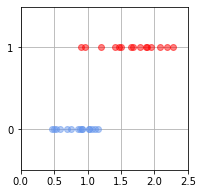

In [3]:
# 리스트 6-1-(2)
# 데이터 분포 표시 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])




# 메인 ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# 리스트 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y
# 리스트 6-1-(4)
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
# 결정 경계
    i = np.min(np.where(y > 0.5))     # (A)
    B = (xb[i - 1] + xb[i]) / 2                # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

In [7]:
# 평균 교차 엔트로피 오차 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# 평균 교차 엔트로피 오차의 미분 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


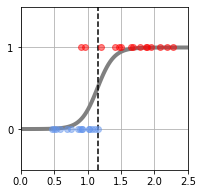

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 리스트 6-1-(8)
from scipy.optimize import minimize

# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # (A)
#     print(res1)
    return res1.x
# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()